In [6]:
import pandas as pd
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import scipy.stats as st
import numpy as np

# 

df = pd.read_csv('/Users/emrahceyhan/Desktop/SpringBoardArchieve/CapstoneProject/Capstone1-HR-Employee-Attrition.csv')

In [7]:
#Explore the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.shape

(1470, 35)

In [9]:
# Looking for NaN
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [10]:
# Delete columns having the value of '1 or any same values for all observation'. 
cols = ["Over18", "StandardHours", "EmployeeCount"]
for i in cols:
    del df[i]

In [11]:
#Check the unique columns in the data to find which are categorical
nunique=df.nunique()
nunique= nunique.sort_values()
nunique

Gender                         2
PerformanceRating              2
OverTime                       2
Attrition                      2
Department                     3
MaritalStatus                  3
BusinessTravel                 3
WorkLifeBalance                4
JobInvolvement                 4
RelationshipSatisfaction       4
StockOptionLevel               4
EnvironmentSatisfaction        4
JobSatisfaction                4
JobLevel                       5
Education                      5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRat

In [12]:
df['Education_r'] = pd.cut(df['Education'], 5, labels=['Below College','College','Bachelor','Master','Doctor'])
df['EnvironmentSatisfaction_r']= pd.cut(df['EnvironmentSatisfaction'], 4, labels=['Low', 'Medium', 'High', 'VeryHigh'])
df['JobInvolvement_r']= pd.cut(df['JobInvolvement'], 4, labels=['Low', 'Medium', 'High', 'VeryHigh'])
df['JobSatisfaction_r']= pd.cut(df['JobSatisfaction'], 4, labels=['Low', 'medium', 'High', 'VeryHigh'])
df['PerformanceRating_r']= pd.cut(df['PerformanceRating'], 4, labels= ['Low', 'Good', 'Outstanding', 'Excellent'])
df['RelationshipSatisfaction_r']= pd.cut(df['RelationshipSatisfaction'], 4, labels= ['Low', 'Medium', 'Outstanding','Excellent'])
df['WorkLifeBalance_r']= pd.cut(df['WorkLifeBalance'], 4, labels=['Bad', 'Good', 'Better', 'Best'])
#Use the pandas get_dummies() function to create dummy variables from the df DataFrame.
df['Attrition_r']= pd.get_dummies(df.Attrition, drop_first = True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,YearsSinceLastPromotion,YearsWithCurrManager,Education_r,EnvironmentSatisfaction_r,JobInvolvement_r,JobSatisfaction_r,PerformanceRating_r,RelationshipSatisfaction_r,WorkLifeBalance_r,Attrition_r
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,0,5,College,Medium,High,VeryHigh,Low,Low,Bad,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,1,7,Below College,High,Medium,medium,Excellent,Excellent,Better,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,0,0,College,VeryHigh,Medium,High,Low,Medium,Better,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,0,Master,VeryHigh,High,High,Low,Outstanding,Better,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,2,2,Below College,Low,High,medium,Low,Excellent,Better,0


In [13]:
df.rename(columns={'���Age': 'Age'}, inplace=True)
df['age_group'] = pd.cut(df['Age'], 3, labels=['Young', 'Middle', 'Senior'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,YearsWithCurrManager,Education_r,EnvironmentSatisfaction_r,JobInvolvement_r,JobSatisfaction_r,PerformanceRating_r,RelationshipSatisfaction_r,WorkLifeBalance_r,Attrition_r,age_group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,5,College,Medium,High,VeryHigh,Low,Low,Bad,1,Middle
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,7,Below College,High,Medium,medium,Excellent,Excellent,Better,0,Senior
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,0,College,VeryHigh,Medium,High,Low,Medium,Better,1,Middle
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,0,Master,VeryHigh,High,High,Low,Outstanding,Better,0,Middle
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,2,Below College,Low,High,medium,Low,Excellent,Better,0,Young


In [14]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_r
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


In [15]:
df['Attrition_r']= pd.get_dummies(df.Attrition, drop_first = True)
df.Attrition_r.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition_r, dtype: uint8

In [21]:
#Can I build a pivot table? Why NaN...
df_pivot = df.pivot_table(index=['EmployeeNumber'], columns=['Attrition_r'], values='Age')
df_pivot.head()

Attrition_r,0,1
EmployeeNumber,,
1,NaN,41.0
2,49.0,NaN
4,NaN,37.0
5,33.0,NaN
7,27.0,NaN


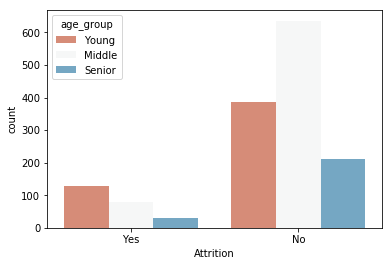

In [21]:
#sns.countplot(df['Attrition'])
#plt.show()
plt.figure()
sns.countplot(x='Attrition', hue='age_group', data=df, palette='RdBu')
plt.xticks([1,0], ['No', 'Yes'])
plt.show()